# **Loan Prediction**

# Data Description


The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

# Objective

- Develop a robust classification model that accurately predicts potential loan defaulters and provide the bank with insightful recommendations regarding crucial factors to consider during the loan approval process.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score,precision_recall_curve
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Load and check data


In [2]:
# Copying data to another variable to avoid any changes to original data
data_original = pd.read_csv('hmeq.csv')
data= data_original.copy()

In [3]:
# Display first five rows
data. head().T

,0,1,2,3,4
BAD,1,1,1,1,0
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860.0,70053.0,13500.0,NaN,97800.0
VALUE,39025.0,68400.0,16700.0,NaN,112000.0
REASON,HomeImp,HomeImp,HomeImp,NaN,HomeImp
JOB,Other,Other,Other,NaN,Office
YOJ,10.5,7.0,4.0,NaN,3.0
DEROG,0.0,0.0,0.0,NaN,0.0
DELINQ,0.0,2.0,0.0,NaN,0.0
CLAGE,94.366667,121.833333,149.466667,NaN,93.333333


In [4]:
# Display last 5 rows
data.tail().T

,5955,5956,5957,5958,5959
BAD,0,0,0,0,0
LOAN,88900,89000,89200,89800,89900
MORTDUE,57264.0,54576.0,54045.0,50370.0,48811.0
VALUE,90185.0,92937.0,92924.0,91861.0,88934.0
REASON,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon
JOB,Other,Other,Other,Other,Other
YOJ,16.0,16.0,15.0,14.0,15.0
DEROG,0.0,0.0,0.0,0.0,0.0
DELINQ,0.0,0.0,0.0,0.0,0.0
CLAGE,221.808718,208.69207,212.279697,213.892709,219.601002


In [5]:
# Check the shape of the data
data.shape

(5960, 13)

- The dataset has 5960 rows and 13 columns.

In [6]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


- REASON and JOB columns are of object type and the rest of the columns are of numeric type.
- There are missing values in the dataset.

#### Analyse missing values

In [7]:
# Analyse missing values
data.isnull()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Check the percentage of missing values in the each column.
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing.sort_values())

BAD         0.000000
LOAN        0.000000
VALUE       1.879195
CLNO        3.724832
REASON      4.228188
JOB         4.681208
CLAGE       5.167785
NINQ        8.557047
YOJ         8.640940
MORTDUE     8.691275
DELINQ      9.731544
DEROG      11.879195
DEBTINC    21.258389
dtype: float64


- The missing values are in small quantities for the different variables, hence we would not drop any of the variables because this will result in information loss. 
- The numerical columns will be replaces by the median value of the respective column
- JOB and REASON are an object type columans. For simplicity, the missing values will be replaced with the most frequent value. i.e for JOB the missing values will be replaced with "Other", for REASON the missing values will be replaced with "DebtCon"

#### Convert data type

In [9]:
#converting "objects" to "category" reduces the data space required to store the dataframe
cols = data.select_dtypes(['object']).columns.tolist()

In [10]:
# Changing the data type of object type column to category
for i in cols:
    data[i] = data[i].astype('category')  

In [11]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   int64   
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(2), float64(9), int64(2)
memory usage: 524.3 KB


#### Statistical analysis

In [12]:
# Analyze the summary statistics for numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


- Average LOAN amount is 18607$
- LOAN, MORTDUE, and VALUE  have high rates range, indicating the diverse financial status of the applicants. The min value and Q1 are close, and the mean is larger than the median which shows a right-skewed distribution.             
- At least 50% of the applicant are 7 years at their current job, which shows a stable income. YOJ is also positively skewed.
- DEROG and DELINQ have a right-skewed distribution which shows that at least 75% of the applicant have 0 negative credit reports
- CLAGE shows a diverse history of a credit line, which again indicates applicants with a diverse credit history and financial status
- Most applicants have 1 credit card and 21 credit lines. However, there are some extreme values given the maximum of 17 cards and 71 lines
- DEBTINC has a high range of Debt-to-income ratio.

**Let's look at the unique values in all the categorical variables**

In [13]:
# Check summary for categorical data since describe function uses only numerical data
data.describe(include=['category']).T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


- Each of the categorical variables has only a few unique values.

In [14]:
# Checking the count of unique values in each categorical column 
cols_cat= data.select_dtypes(['category'])
for i in cols_cat.columns:
     print('Unique values in',i, 'are :')
     print(data[i].value_counts(normalize=True))
     print('*'*40)

Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


- JOB and REASON are an object type columans. For simplicity, the missing values can be replaced with the most frequent value. i.e for JOB the missing values will be replaced with "Other", for REASON the missing values will be replaced with "DebtCon".

# Exploratory Data Analysis and Visualization

#### Univariate Analysis - Histogram and Boxplots

BAD
Skew : 1.5


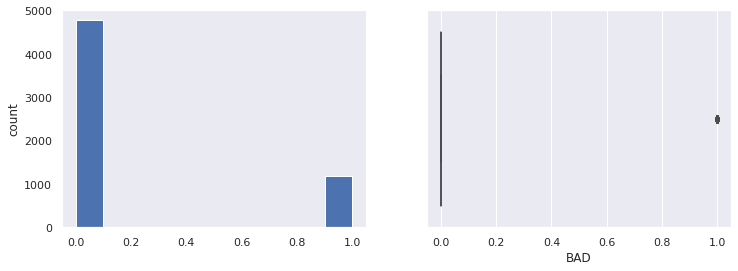

LOAN
Skew : 2.02


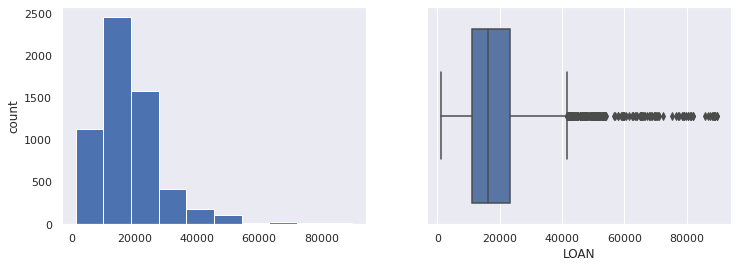

MORTDUE
Skew : 1.81


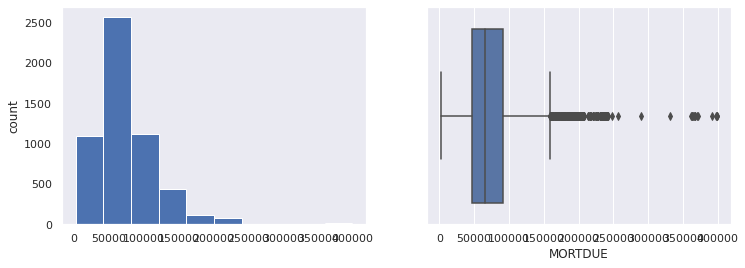

VALUE
Skew : 3.05


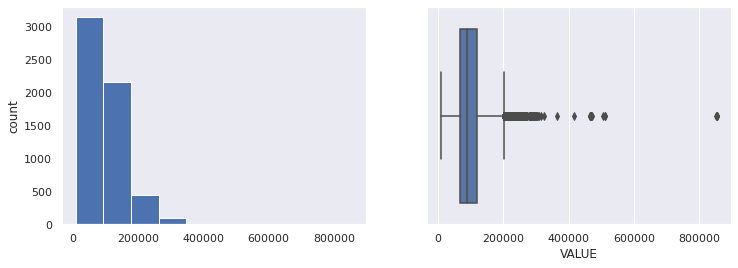

YOJ
Skew : 0.99


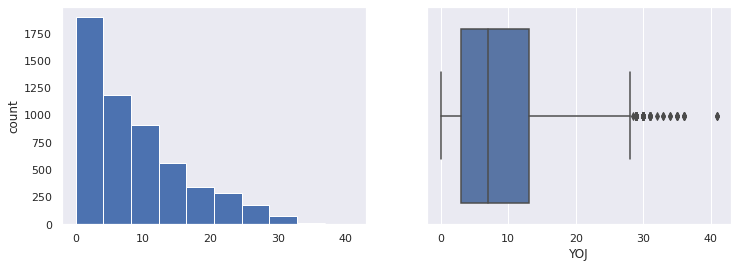

DEROG
Skew : 5.32


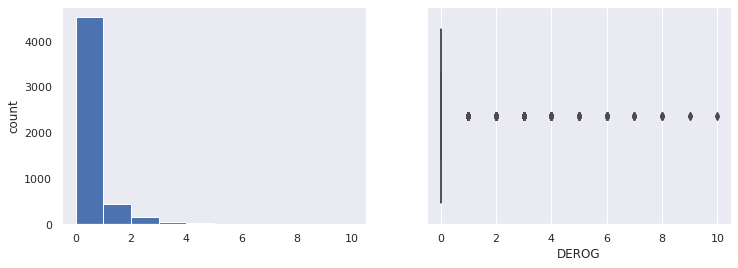

DELINQ
Skew : 4.02


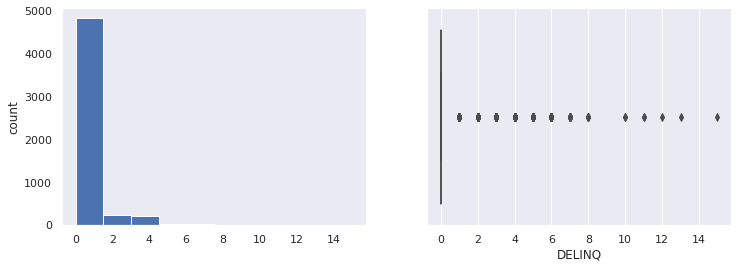

CLAGE
Skew : 1.34


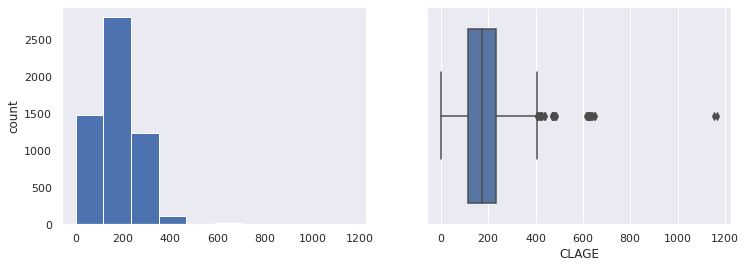

NINQ
Skew : 2.62


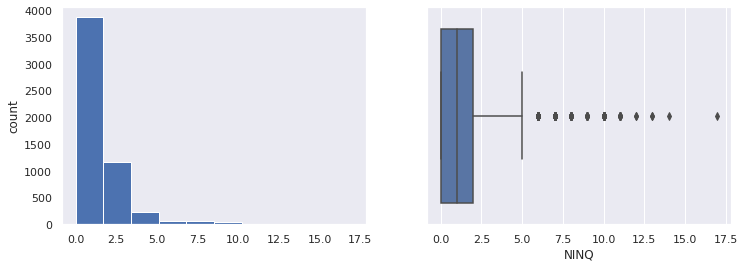

CLNO
Skew : 0.78


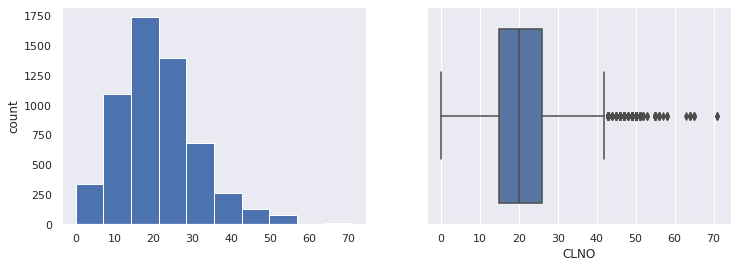

DEBTINC
Skew : 2.85


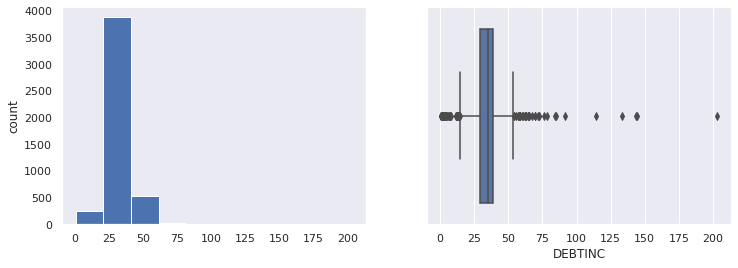

In [15]:
# Univariate Analysis for numerical Data
num_data = data.select_dtypes('number')

for col in num_data:
    print(col)
    
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize = (12, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

- All the variables except DEBTINC have a right-skewed distribution with outliers on the right end.
- DEBTINC ratio is the only variable that also shows outliers on the right and left ends.
- DEROG and DELINQ show very few major reports and delinquent credit lines. Creating a binary variable with a value of 'o' for no report/delinquent credit lines and a value of '1' for 1 or more reports/delinquent credit lines might be more convenient.
- Some variables have a high number of outliers - LOAN, MORTDUE, VALUE, CLNO, DEBTINC.
- The 'typical client'  have a loan of ~15000, a mortgage of  ~75000, and the value of their property is ~100000
- The 'typical client' is ~5 years in their current job.
- The 'typical client' have a credit history with no major derogatory report and 1 delinquent credit line and ~1 credit inquiry.
-  The 'typical client' have ~20 existing credit lines when the oldest one is ~200 month.
- The 'typical client' have a Debt-to-income ratio  between 25 to 50 percent.
- Identifying clients that are not the typical client profile might help in predicting what clients  are likely to default on their loan.

#### Univariate Analysis - Barplots

In [16]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

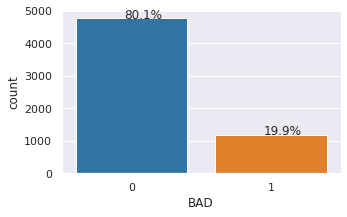

In [17]:
#Build barplot for BAD
plt.figure(figsize=(5,3))
ax = sns.countplot(data["BAD"],palette="tab10")
perc_on_bar(ax,data["BAD"])

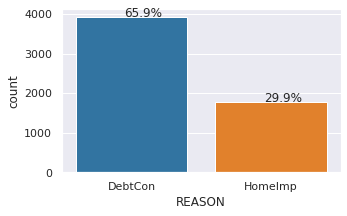

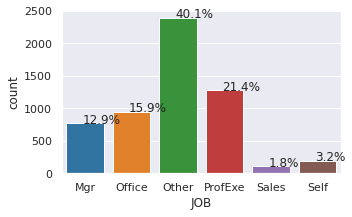

In [18]:
# Univariate Analysis for Categorical Data

#Build barplot for REASON
plt.figure(figsize=(5,3))
ax = sns.countplot(data["REASON"],palette="tab10")
perc_on_bar(ax,data["REASON"])

#Build barplot for JOB
plt.figure(figsize=(5,3))
ax = sns.countplot(data["JOB"],palette="tab10")
perc_on_bar(ax,data["JOB"])

- ~80% of the clients repaid their loans. This number is significantly higher than the number of clients who defaulted on a loan, which is ~20%. Note: the data is imbalnce- this should be considered when builiding classifaction model
- ~65 of the clients took a loan to pay off other liabilities and consumer debts.
- The JOB types are mostly labeled as 'other'. All the other job types -  manager, office, ProfExe are between 10-20%, and sales and self-employed are ~2%.

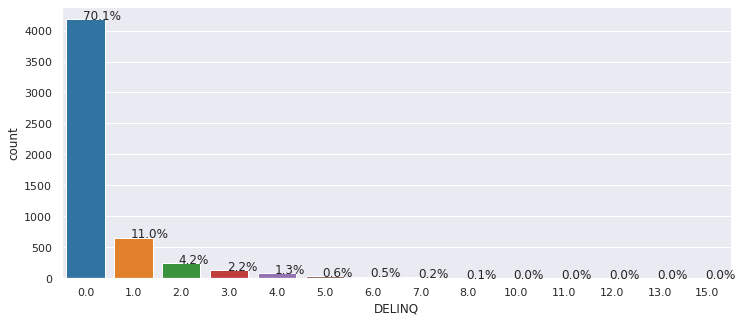

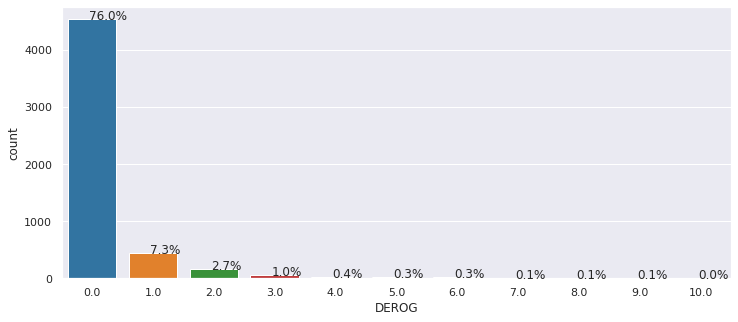

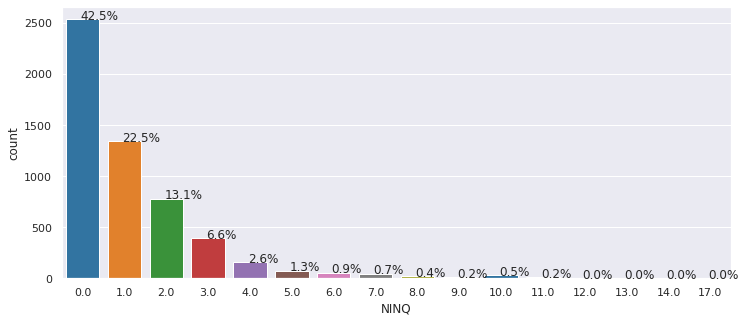

In [19]:
# Analyze Barplot for other variables -DELINQ, DEROG, NINQ

#Build barplot for DELINQ
plt.figure(figsize=(12,5))
ax = sns.countplot(data["DELINQ"],palette='tab10')
perc_on_bar(ax,data["DELINQ"])

#Build barplot for DEROG
plt.figure(figsize=(12,5))
ax = sns.countplot(data["DEROG"],palette='tab10')
perc_on_bar(ax,data["DEROG"])

#Build barplot for NINQ
plt.figure(figsize=(12,5))
ax = sns.countplot(data["NINQ"],palette='tab10')
perc_on_bar(ax,data["NINQ"])

- We can see again that DELINQ and DEROG show very few major reports and delinquent credit lines. This explains the outliers for these variables. 
- Most of the applicants have no credit inquiries (42.5%), and the graph farther decrsing as the number of credit inquiries is greater.

**We observed earlier that there is a typical loan, mortgage, and property value rates. Let's see if atypical clients are more likely to default on their loan.**

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

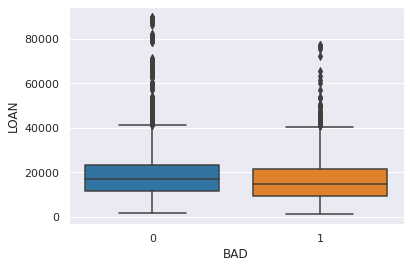

In [20]:
sns.boxplot(data["BAD"],data['LOAN'],palette="tab10")

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

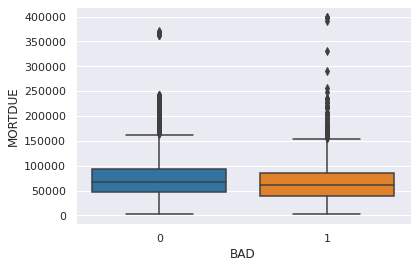

In [21]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="tab10")

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

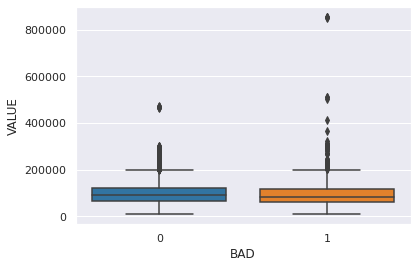

In [22]:
sns.boxplot(data["BAD"],data['VALUE'],palette="tab10")

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

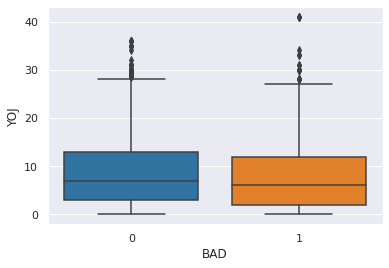

In [23]:
sns.boxplot(data["BAD"],data['YOJ'],palette="tab10")

- The LOAN, MORTDUE, and property VALUE show no relation to the ability to repay the loan. 
- Let's consider the employment profile.

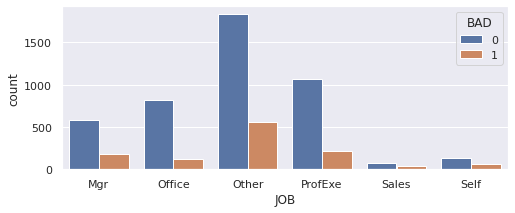

In [24]:
plt.figure(figsize = (8, 3))
sns.countplot(x = 'JOB', hue = 'BAD', data = data)
plt.show()

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

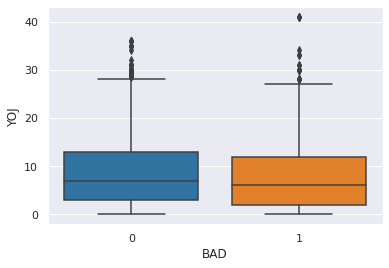

In [25]:
sns.boxplot(data["BAD"],data['YOJ'],palette="tab10")

- The plot shows that clients who work in a job that is labeled as 'other' are more likely to default on their loan, but this correlates with ‘other’ being the most labeled job type. 
- Employment profile- the type of job and year on the job show no relation to the ability to repay the loan.
- Let’s look at the credit history.

- Before we further analyze the credit history let's create a binary variable with values 1 or 0 for DEROG and DELINQ. 
- As we saw that DEROG and DELINQ show very few major reports and delinquent credit lines. Creating a binary variable with a value of 'o' for no report/delinquent credit lines and a value of '1' for 1 or more reports/delinquent credit lines might be more convenient.

In [26]:
# Creating a binary variable with values 1 or 0.
data["Binary_DEROG"] = (data["DEROG"]>=1)*1
data["Binary_DELINQ"] = (data["DELINQ"]>=1)*1

In [27]:
# Lets look at the new binary clouman 
print(data["Binary_DEROG"].unique())
print(data["Binary_DELINQ"].unique())

[0 1]
[0 1]


Let’s continue with the bivariate analysis of the credit history.

<AxesSubplot:xlabel='BAD', ylabel='Binary_DEROG'>

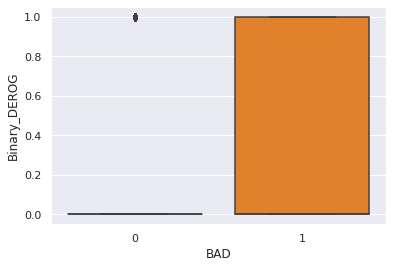

In [28]:
sns.boxplot(data["BAD"],data['Binary_DEROG'],palette="tab10")

- The plot shows a relation between clients with no derogatory reports and the ability to repay their loan. Except for 1 outlier

**Let's test if the mean number of the DEROG is statistically different for defaulted loans**

- 𝐻0: The mean number of DEROG is not different for default and repaid loans
- 𝐻𝑎: The mean number of DEROG is different for default and repaid loans

In [29]:
a = data.Binary_DEROG[data['BAD'] ==0]
b = data.Binary_DEROG[data['BAD'] ==1]
tstast, p_value = stats.ttest_ind(a, b, nan_policy = 'omit')
if (p_value < 0.05):
    print('statistic=',tstast, 'pvalue=',p_value, "\n" 'reject the null hypothesis- The mean number of DEROG is different for default and repaid loans')
else:
    print('statistic=',tstast, 'pvalue=',p_value, "\n" 'accept the null hypothesis- The mean number of DEROG is not different for default and repaid loans')

statistic= -20.887962885101167 pvalue= 1.452054156261957e-93 
reject the null hypothesis- The mean number of DEROG is different for default and repaid loans


<AxesSubplot:xlabel='BAD', ylabel='Binary_DELINQ'>

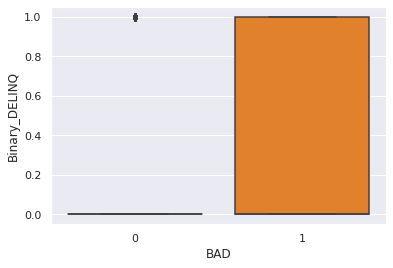

In [30]:
sns.boxplot(data["BAD"],data['Binary_DELINQ'],palette="tab10")

- The plot shows a relation between clients who don't have any delinquent credit lines and the ability to repay their loan. Except for 1 outlier

**Let's test if the mean number of the DELINQ is statistically different for defaulted loans**

- 𝐻0: The mean number of DELINQ is not different for default and repaid loans
- 𝐻𝑎: The mean number of DELINQ is different for default and repaid loans

In [31]:
a = data.Binary_DELINQ[data['BAD'] ==0]
b = data.Binary_DELINQ[data['BAD'] ==1]
tstast, p_value = stats.ttest_ind(a, b, nan_policy = 'omit')
if (p_value < 0.05):
    print('statistic=',tstast, 'pvalue=',p_value, "\n" 'reject the null hypothesis- The mean number of DELINQ is different for default and repaid loans')
else:
    print('statistic=',tstast, 'pvalue=',p_value, "\n" 'accept the null hypothesis- The mean number of DELINQ is not different for default and repaid loans')

statistic= -25.002396414664823 pvalue= 2.761127906963498e-131 
reject the null hypothesis- The mean number of DELINQ is different for default and repaid loans


<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

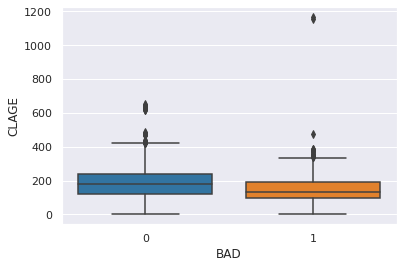

In [32]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="tab10")

<AxesSubplot:xlabel='BAD', ylabel='NINQ'>

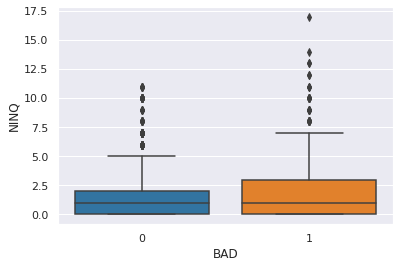

In [33]:
sns.boxplot(data["BAD"],data['NINQ'],palette="tab10")

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

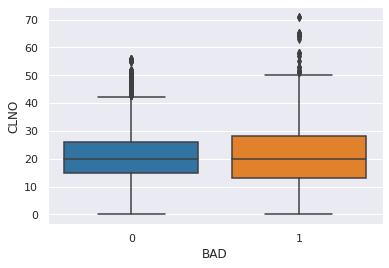

In [34]:
sns.boxplot(data["BAD"],data['CLNO'],palette="tab10")

- The Age of the oldest credit line shows no relation to the ability to repay the loan
-  The number of recent credit inquiries shows no relation to the ability to repay the loan.
- The number of existing credit lines shows no relation to the ability to repay the loan.

- Lets look at the reason for the loan request. 

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


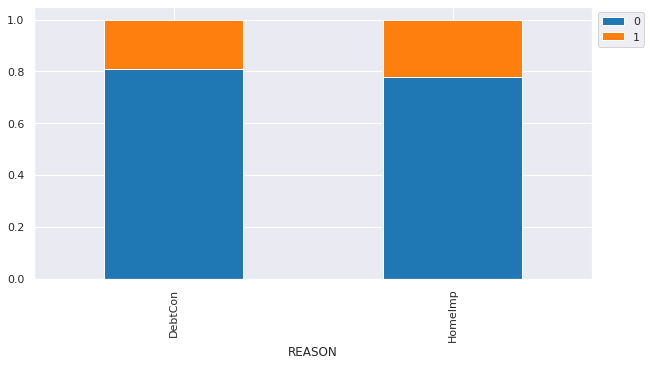

In [35]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='tab10')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

- About ~20% of the loans defaulted whether the reason for the loan is home improvement or DebtCon, and yet we can see that for loans that were requested for home improvement slightly more people defaulted on their loans. 
- There seems to be a weak relation between requesting a loan for home improvement and the ability to repay the loan.

#### Bivariate Analysis: Two Continuous Variables

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

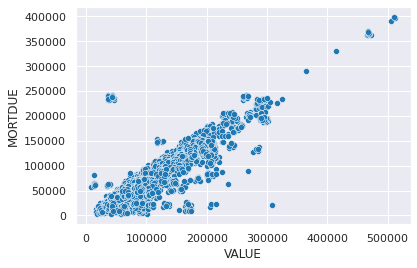

In [36]:
sns.scatterplot(data["VALUE"],data['MORTDUE'])

- There is a positive relationship betwen MORTDUE and VALUE
- We can consider dropping MORTDUE or VALUE as they higly corralte

<AxesSubplot:xlabel='CLAGE', ylabel='LOAN'>

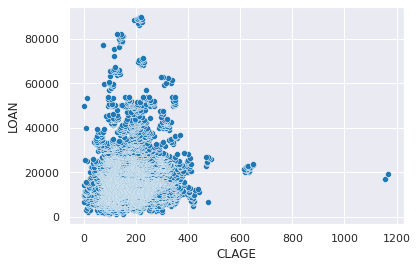

In [37]:
sns.scatterplot(data["CLAGE"],data['LOAN'])

<AxesSubplot:xlabel='CLAGE', ylabel='MORTDUE'>

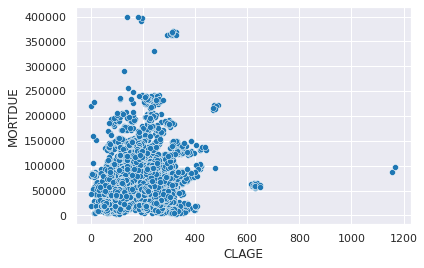

In [38]:
sns.scatterplot(data["CLAGE"],data['MORTDUE'])

- There is no clear tendency between CLAGE vs. LOAN and CLAGE vs. MORTDUE.
- We can see outliers with high CLAGE and low LOAN/ MORTDUE amounts.

<AxesSubplot:xlabel='DELINQ', ylabel='LOAN'>

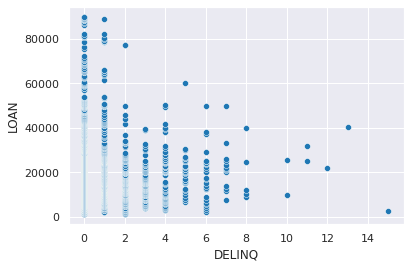

In [39]:
sns.scatterplot(data["DELINQ"],data['LOAN'],palette="PuBu")

<AxesSubplot:xlabel='DEROG', ylabel='LOAN'>

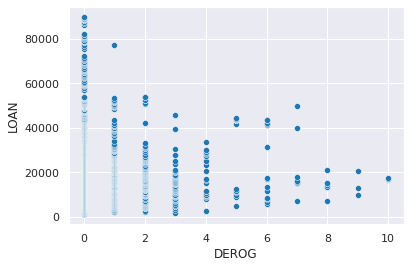

In [40]:
sns.scatterplot(data["DEROG"],data['LOAN'],palette="PuBu")

- There is a negative tendency between DELINQ vs. LOAN and DEROG vs. LOAN. As the number of DELINQ/DEROG increases, the loan amount decreases
- The tendency is stronger for DELINQ.

<AxesSubplot:xlabel='CLNO', ylabel='VALUE'>

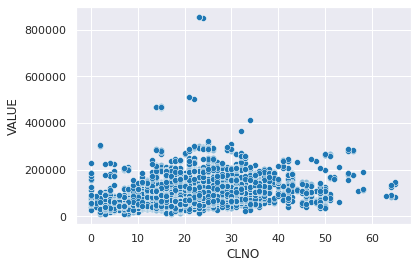

In [41]:
sns.scatterplot(data["CLNO"],data['VALUE'],palette="PuBu")

- There is no clear tendency between CLNO vs. VALUE

#### Multivariate Analysis

#### Correlation Heatmap for Numerical Variables

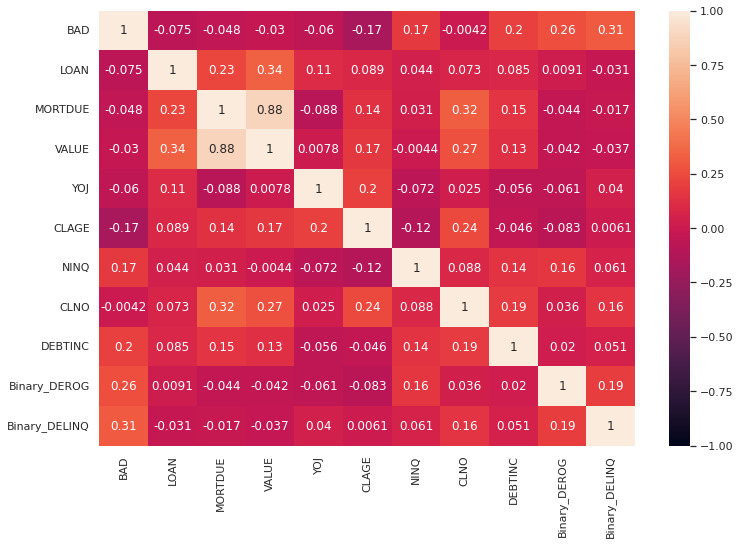

In [42]:
data = data[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'Binary_DEROG',
       'Binary_DELINQ']].copy()

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),vmax=1,vmin=-1, annot= True)
plt.show()

Let's sort by ‘BAD’ in a descending order

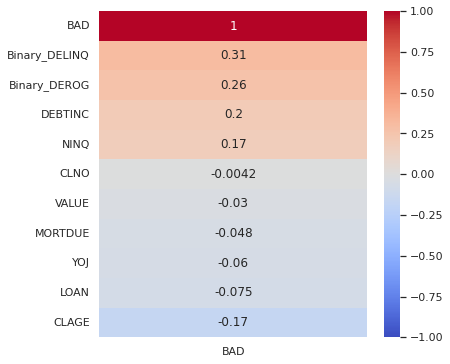

In [43]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr()[['BAD']].sort_values(by=['BAD'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

- There is a moderate positive correlation between the target variable (BAD) and credit history- DELINQ, DEROG

## **Treating Outliers and missing values**

In [44]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = data[col].quantile(q = 0.25) # 25th quantile
    Q3 = data[col].quantile(q = 0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = (Q1 - 1.5 * IQR)  #define lower whisker
    Upper_Whisker = (Q3 + 1.5 * IQR)  # define upper Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data


In [45]:
print(cols)

['REASON', 'JOB']


In [46]:
cols.append('BAD')

In [47]:
print(cols)

['REASON', 'JOB', 'BAD']


In [48]:
for i in cols:
    data[i] = data[i].astype('category')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   BAD            5960 non-null   category
 1   LOAN           5960 non-null   int64   
 2   MORTDUE        5442 non-null   float64 
 3   VALUE          5848 non-null   float64 
 4   REASON         5708 non-null   category
 5   JOB            5681 non-null   category
 6   YOJ            5445 non-null   float64 
 7   CLAGE          5652 non-null   float64 
 8   NINQ           5450 non-null   float64 
 9   CLNO           5738 non-null   float64 
 10  DEBTINC        4693 non-null   float64 
 11  Binary_DEROG   5960 non-null   int64   
 12  Binary_DELINQ  5960 non-null   int64   
dtypes: category(3), float64(7), int64(3)
memory usage: 483.7 KB


In [50]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')


**treating missing values in cleaned_data**

In [51]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

data_cleaned = treat_outliers_all(df_raw,numerical_col)

In [52]:
print(data_cleaned["BAD"].unique())

[1, 0]
Categories (2, int64): [0, 1]


In [53]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(data,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    data[new_col] = data[col].isnull()
    return data

In [54]:
# list of columns that has missing values in it
missing_col = [col for col in data_cleaned.columns if data_cleaned[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data_cleaned,colmn)
    

In [55]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data_cleaned.select_dtypes('number')

# Select string and object columns.
cat_data = data_cleaned.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Fill numeric columns with median.
data_cleaned[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data_cleaned[column].mode()[0]
    data_cleaned[column] = data_cleaned[column].fillna(mode)

In [56]:
#checking that there are no missing values
data_cleaned.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
Binary_DEROG                   0
Binary_DELINQ                  0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

**treating missing values in the original data by adding a binary flag and imputing values**

#### Adding new columns in the dataset for each column which has missing values 

In [57]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(data,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    data[new_col] = data[col].isnull()
    return data

In [58]:
# list of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [59]:
print(data["BAD"].unique())

[1, 0]
Categories (2, int64): [0, 1]


In [60]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist() #df.select_dtypes('object')

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [61]:
#checking that there are no missing values
data.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
Binary_DEROG                   0
Binary_DELINQ                  0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

- All missing values are imputed. 

In [62]:
data.head().T

,0,1,2,3,4
BAD,1,1,1,1,0
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860.0,70053.0,13500.0,65019.0,97800.0
VALUE,39025.0,68400.0,16700.0,89235.5,112000.0
REASON,HomeImp,HomeImp,HomeImp,DebtCon,HomeImp
JOB,Other,Other,Other,Other,Office
YOJ,10.5,7.0,4.0,7.0,3.0
CLAGE,94.366667,121.833333,149.466667,173.466667,93.333333
NINQ,1.0,0.0,1.0,1.0,0.0
CLNO,9.0,14.0,10.0,20.0,14.0


# Summary of EDA

Let's summarise the most important observation from the exploratory analysis:
- The mean number of major derogatory reports is statistically higher for defaulted loans.
- The mean number of delinquent credit lines is statistically higher for default loans.
- There is a positive relationship between the MORTDUE  Amount and  the VALUE of the property
- There is a negative tendency between delinquent credit lines (DELINQ) vs. LOAN amount
- There is a negative tendency between the number of derogatory reports (DEROG) vs. the LOAN amount.
- As the number of DELINQ/DEROG increases, the loan amount decreases
- There is a moderate positive correlation between the target variable (BAD) and credit history- DELINQ, DEROG

**Now that we have explored our data, let's build the model.**

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model.
5. Test the data on the test set.
6. The techniques that will be explored are Logistic Regression, Decision Tree, and Random Forest Classifier.
7. Adopt the model that gives the best performance
8. Draw conclusions and recommendations based on the best-performing model.  This will help to understand the important features of approving a loan and predicting clients that are likely to default on their loan.

# Data preparation for model

- We want to predict who is likely to default on a loan.
- Before I proceed to build a model, I'll have to encode categorical features.
- I will split the data into train and test sets to be able to evaluate the model that we build on the train data.
- I will tune the model and prune the tree, if required
- I will test the model on test set

In [63]:
# Separating the target variable and other variables
X = data_cleaned.drop(columns = ['BAD'])
X = pd.get_dummies(X,drop_first=True)
y = data_cleaned['BAD']

print(X.shape, y.shape)

(5960, 25) (5960,)


In [64]:
print(y.unique())

[1, 0]
Categories (2, int64): [0, 1]


In [65]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 25) (1788, 25)


In [66]:
y.value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

In [67]:
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 25)
Shape of the test set:  (1788, 25)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


## **Model evaluation criterion**

**Before training the model, let's choose the appropriate model evaluation criterion**

  **Model can make wrong predictions as:**

1. Predicting an applicant will default on a loan, but in reality, the applicant would repay the loan.
2. Predicting an applicant will repay the loan, but in reality, the applicant  would default on the loan

  **Which case is more important?** 

1. In the first case, the bank rejected the loan and lost a potential client- the bank will not profit from the interest rate
2. In the second case, the bank approved the loan and the loan defaulted- the bank loses on a defaulted loan.

The loss for a defaulted loan is greater for the bank. 

  **How to reduce the losses?**

The bank wants to maximize the recall. The greater the recall score, the higher chances to minimize the False Negative case that results in defulted loans. 

  **what is a good preforimg model?**
  
The best preforming model will be tested based on it's total preformance. Im looking to have a model that shows 85%+ accuracy, 70%+ recall and at least 65% precision. 

This is a classification prediction problem. The algorithms that will be explored are:
- logistic regresstion model
- Decision tree model
- Random forest tree
- Boosting models 
- K-nearest neighbors 

In [68]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [69]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)
    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    precision = precision_score(target, pred, average = 'macro')              # To compute precision        
    acc = accuracy_score(target, pred)                                 # To compute accuracy score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

# Logistic Regression Model

Since the data is imbalanced,we will define the model with class weights as a standard parameter as “balanced”

In [70]:
# Defining the Logistic regression model
lg = LogisticRegression(class_weight='balanced')
lg

LogisticRegression(class_weight='balanced')

In [71]:
# Fitting the model on the training data
lg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.88      0.59      0.71      3355
           1       0.28      0.67      0.40       817

    accuracy                           0.60      4172
   macro avg       0.58      0.63      0.55      4172
weighted avg       0.76      0.60      0.65      4172



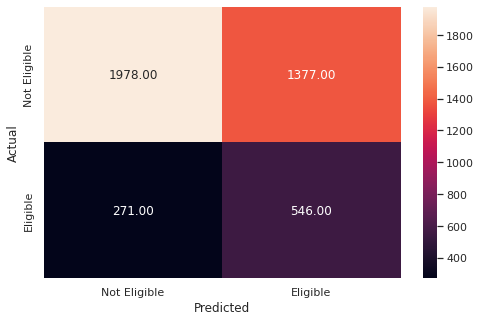

In [72]:
#Predict for train set
y_pred_train = lg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.87      0.59      0.70      1416
           1       0.30      0.66      0.41       372

    accuracy                           0.61      1788
   macro avg       0.58      0.63      0.56      1788
weighted avg       0.75      0.61      0.64      1788



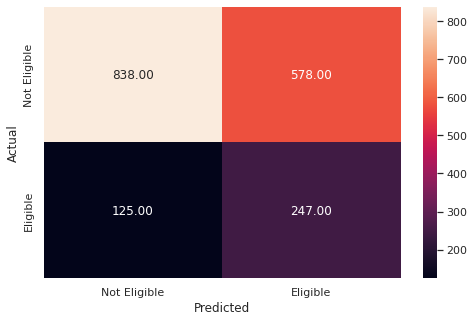

In [73]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)

#checking the performance on the train dataset
metrics_score(y_test, y_pred_test)

In [74]:
lg_test = model_performance_classification(lg,X_test,y_test)
lg_test

,Precision,Recall,Accuracy
0,0.584796,0.627893,0.606823


- We are getting an accuracy of about 60% on the train and the test datasets.
- The recall for this model is only 67% for class 1 on the train data and 66% test data.
- As the recall is low this model will not perform well on in detecting applicants that will default on a loan, meaning it will lead to the bank loss on a defaulted loan

####  Checking the coefficients 

Let's check the coefficients and find which variables are leading to loan default and which can help to reduce the default.

In [75]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,0.042594
CLNO,0.014293
NINQ,0.004842
DEBTINC_missing_values_flag,0.003858
YOJ,0.002108
JOB_Other,0.000693
VALUE_missing_values_flag,0.000582
REASON_HomeImp,0.000496
CLAGE_missing_values_flag,0.000160
JOB_Self,0.000140


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [76]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
DEBTINC,1.043514
CLNO,1.014395
NINQ,1.004854
DEBTINC_missing_values_flag,1.003866
YOJ,1.002110
JOB_Other,1.000694
VALUE_missing_values_flag,1.000582
REASON_HomeImp,1.000496
CLAGE_missing_values_flag,1.000160
JOB_Self,1.000140


- High debt-to-income ratio increases the odds of default on a loan 1.04 times more than a low debt-to-income ratio. high DEBTINC indicates that the applicant can not afford his/hers monthly mortgage payments, and having too much debt can be a sign of missing a payment or defaulting on the loan. 
- Features that positively affect loan default:
DEBTINC, CLNO, NINQ, DEBTINC_missing_values_flag,YOJ, JOB_Other,VALUE_missing_values_flag, REASON_HomeImp, CLAGE_missing_values_flag, JOB_Self, JOB_Sales, CLNO_missing_values_flag, REASON_missing_values_flag, MORTDUE_missing_values_flag		
- Features that negatively affect loan default: VALUE, MORTDUE, LOAN, NINQ_missing_values_flag, JOB_ProfExe, YOJ_missing_values_flag, JOB_missing_values_flag, JOB_Office, CLAGE		

#### Precision-Recall Curve for Logistic Regression

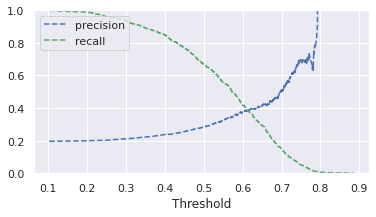

In [77]:
y_scores_lg = lg.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (6, 3))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 1])
plt.show()

We can see that the precision and the recall are balanced for a threshold of about 0.6

Let's find out the performance of the model at this threshold.

#### **Logistic regresstion model using 0.6 treshold**

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3355
           1       0.37      0.42      0.39       817

    accuracy                           0.75      4172
   macro avg       0.61      0.62      0.62      4172
weighted avg       0.76      0.75      0.75      4172



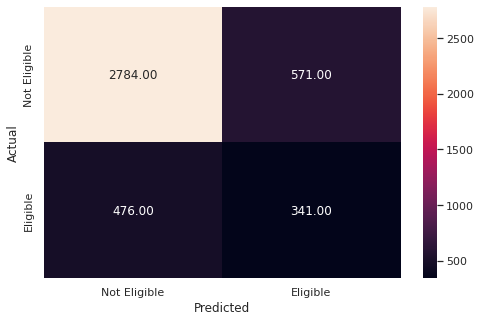

In [78]:
optimal_threshold1 = .6

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1416
           1       0.37      0.39      0.38       372

    accuracy                           0.73      1788
   macro avg       0.60      0.61      0.60      1788
weighted avg       0.74      0.73      0.74      1788



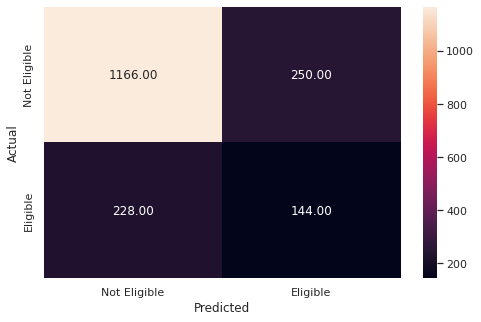

In [79]:
optimal_threshold1 = .6

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [80]:
lg_6_test = model_performance_classification(lg,X_test,y_test)
lg_6_test

,Precision,Recall,Accuracy
0,0.584796,0.627893,0.606823


- The accuracy score increases to ~75% on the train and the test datasets
- The recall score decreases to 42% for class 1 on the train data and 39% for test data.
- As the recall is very low this model will not perform well on in detecting applicants that will default on a loan, meaning it will lead to the bank loss on a defaulted loan
- Since we are interested in higher recall let's see if we can get a better result using with a decreased treshold 

#### **Logistic regresstion model using 0.45 treshold**

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.89      0.45      0.60      3355
           1       0.25      0.77      0.38       817

    accuracy                           0.51      4172
   macro avg       0.57      0.61      0.49      4172
weighted avg       0.76      0.51      0.56      4172



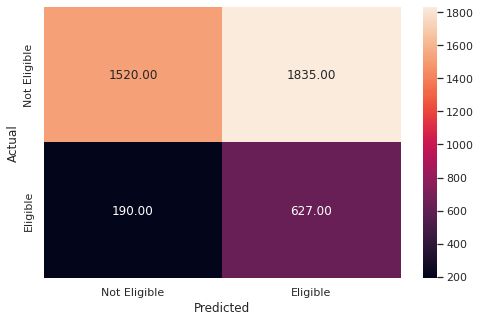

In [81]:
optimal_threshold1 = .45

y_pred_train = lg.predict_proba(X_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.88      0.47      0.61      1416
           1       0.27      0.75      0.40       372

    accuracy                           0.53      1788
   macro avg       0.57      0.61      0.51      1788
weighted avg       0.75      0.53      0.57      1788



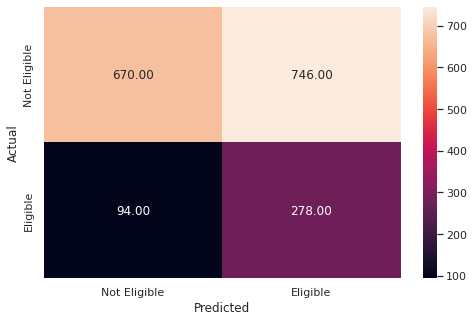

In [82]:
optimal_threshold1 = .45

y_pred_test = lg.predict_proba(X_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

In [83]:
lg_45_test = model_performance_classification(lg,X_test,y_test)
lg_45_test

,Precision,Recall,Accuracy
0,0.584796,0.627893,0.606823


- As expected the accuracy score decreased to 53%
- The recall score increased to 77% for class 1 on the train data and 75% % for test data.
- Although the recall score increased significantly the total preference of the model is not sufficient considering the performance score criteria we have defined. 

# Decision Tree Model

#### Data Preparation for the tree based model

I will use the original data treated for missing values

In [84]:
# Separating the target variable and other variables
X = data_cleaned.drop(columns = ['BAD'])
X = pd.get_dummies(X,drop_first=True)
y = data_cleaned['BAD']

print(X.shape, y.shape)

(5960, 25) (5960,)


In [85]:
print(y.unique())

[1, 0]
Categories (2, int64): [0, 1]


In [86]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4172, 25) (1788, 25)


In [87]:
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (4172, 25)
Shape of the test set:  (1788, 25)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


In [88]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = 'balanced', random_state = 1)

# Fitting the decision tree classifier on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



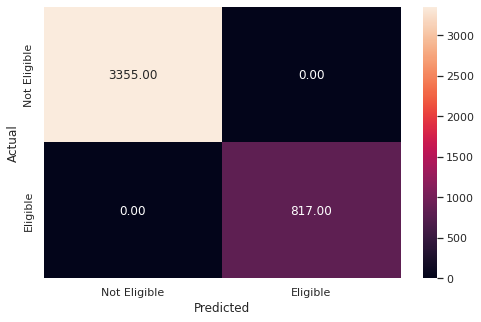

In [89]:
# Checking performance on the training data
Y_pred_train1 = dt.predict(X_train)

metrics_score(y_train, Y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1416
           1       0.70      0.58      0.64       372

    accuracy                           0.86      1788
   macro avg       0.80      0.76      0.77      1788
weighted avg       0.85      0.86      0.86      1788



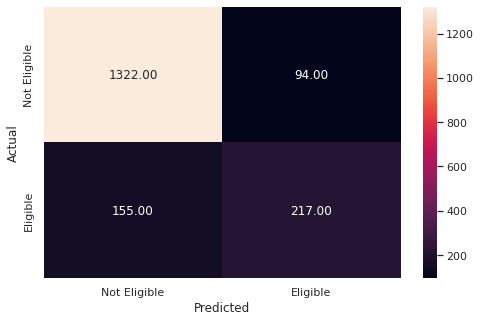

In [90]:
# Checking performance on the testing data
Y_pred_test1 = dt.predict(X_test)

metrics_score(y_test, Y_pred_test1)

In [91]:
dtree_test = model_performance_classification(dt,X_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.796403,0.758475,0.860738


- The Decision Tree gives 100% score for the train data set, i.e., the Decision Tree is overfitting the training data.
- The recall is 58% in comparison to 1 for the training dataset
- The precision on the test data suggests that there's a 30% (1 - 0.7) chance that the model will predict that a loan will default even though it would not

#### Checking the feature importance

<AxesSubplot:xlabel='Importance'>

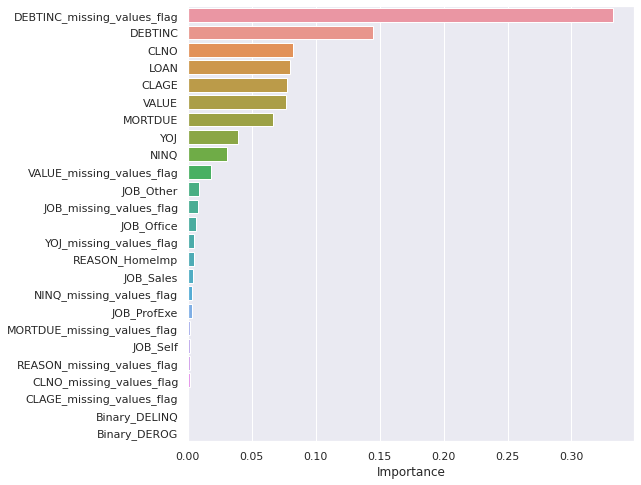

In [92]:
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(importance_df.Importance, importance_df.index)

- According to the Decision Tree, DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC. This signifies that applicants who are at risk of default a loan have high debt and relatively low income
- The other important features CLNO, LOAN, CLAGE, VALUE, MORTDUE.

### **Decision Tree - Hyperparameter Tuning**

### Using GridSearchCV for Hyperparameter tuning on the model

In [93]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = 'balanced')

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_samples_leaf=25, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3355
           1       0.57      0.85      0.68       817

    accuracy                           0.85      4172
   macro avg       0.76      0.85      0.79      4172
weighted avg       0.88      0.85      0.86      4172



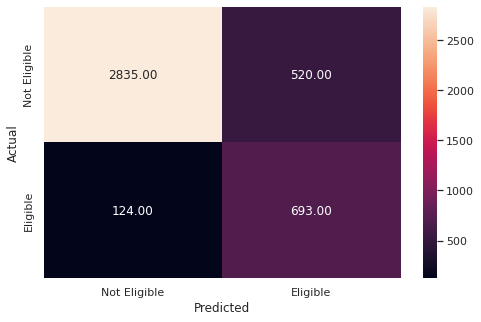

In [94]:
# Checking performance on the training dataset
y_train_pred_dt = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1416
           1       0.57      0.78      0.66       372

    accuracy                           0.83      1788
   macro avg       0.75      0.81      0.77      1788
weighted avg       0.86      0.83      0.84      1788



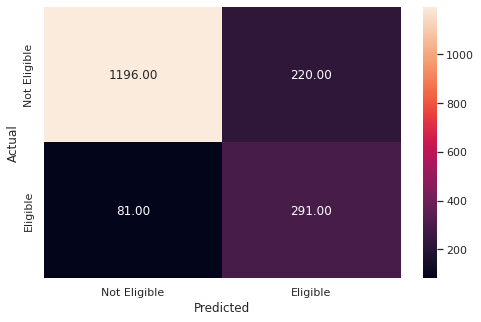

In [95]:
# Checking performance on the test dataset
y_test_pred_dt = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [96]:
dtree_tuned_test = model_performance_classification(d_tree_tuned,X_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.753021,0.813445,0.831655


- This model is not overfitting the training data and the recall score increases to 78% for the test set 
- Precision has gone down from 71% to 57%
- The model gives consistent result for the train and test data sets

#### Checking the tuned decision tree feature importance

<AxesSubplot:xlabel='Importance'>

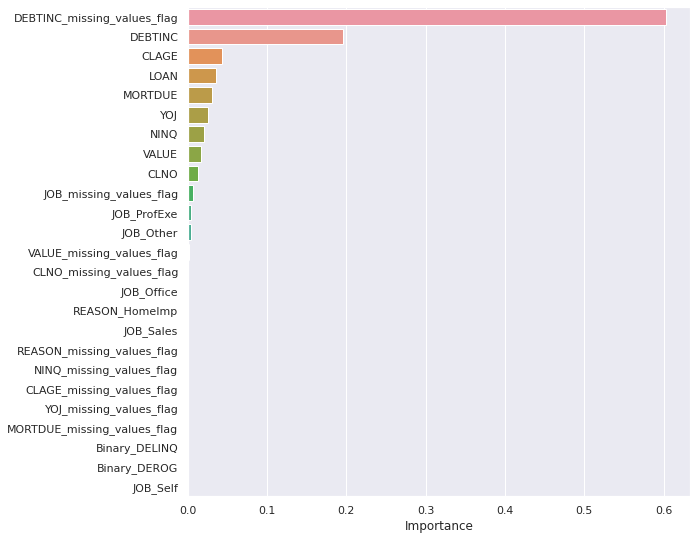

In [97]:
importances =d_tree_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (9, 9))
sns.barplot(importance_df.Importance, importance_df.index)

- After tuning the DT model we are getting fewer features that are important.
- According to this model too, the DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC.
- The other features are much less impactful in defaulting on a loan.
- The tuned model is more generalized than the default model.

#### Plotting the Decision Tree

Let's visualize the tuned decision tree and observe the decision rules:

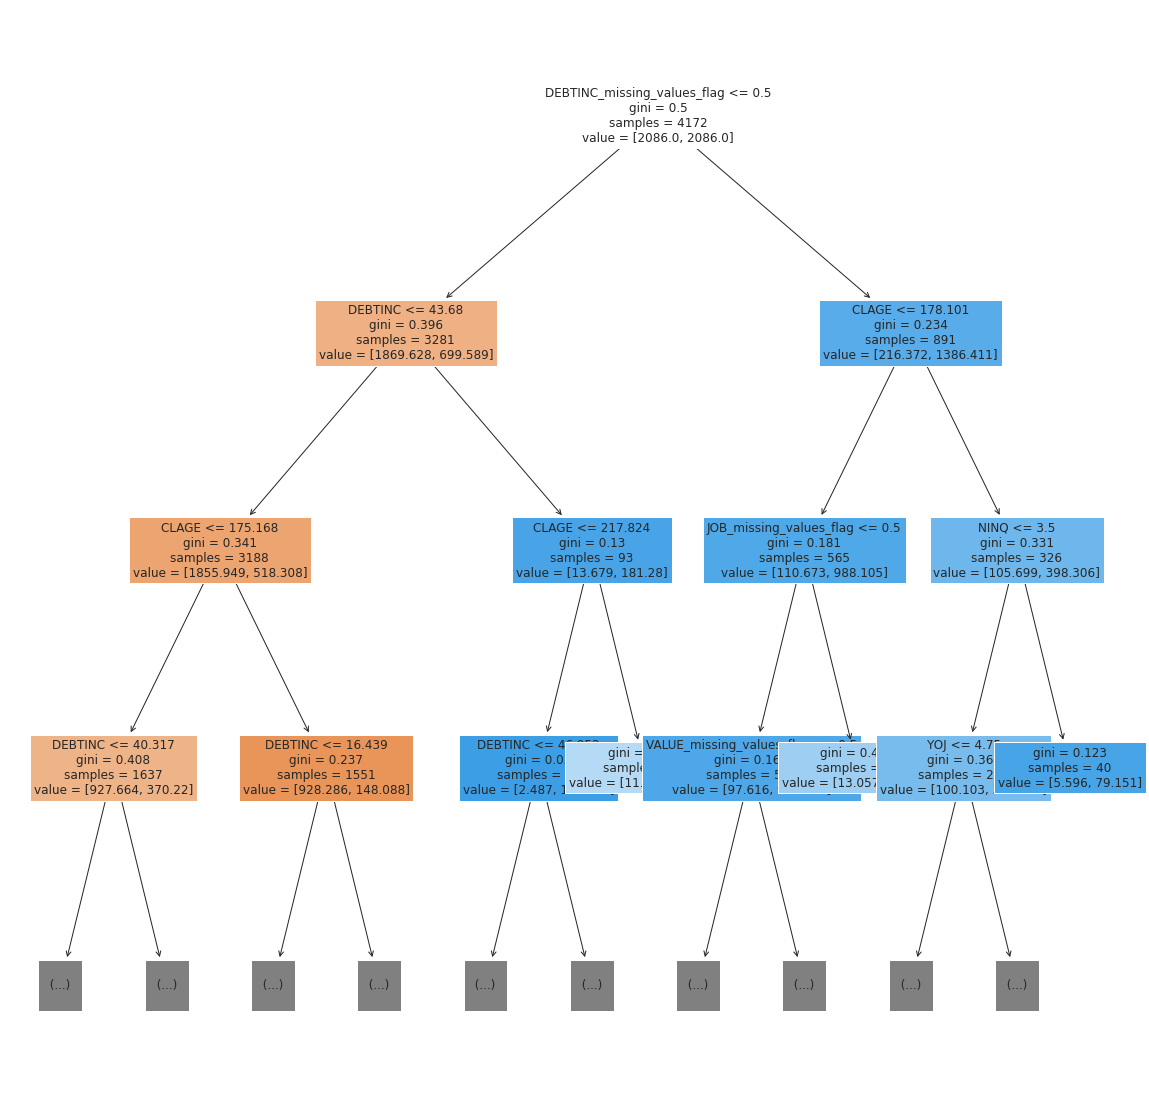

In [98]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, max_depth = 3, feature_names = features, filled = True, fontsize = 12)

plt.show()

- Blue leaves represent the defult loans, i.e., y[1] and the orange leaves represent the reapy loan, i.e., y[0].
- The more the number of observations in a leaf, the darker its color gets.

In [99]:
text_representation = tree.export_text(d_tree_tuned, feature_names= features)
print(text_representation)

|--- DEBTINC_missing_values_flag <= 0.50
|   |--- DEBTINC <= 43.68
|   |   |--- CLAGE <= 175.17
|   |   |   |--- DEBTINC <= 40.32
|   |   |   |   |--- CLNO <= 5.50
|   |   |   |   |   |--- YOJ <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- YOJ >  4.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- CLNO >  5.50
|   |   |   |   |   |--- LOAN <= 9550.00
|   |   |   |   |   |   |--- MORTDUE <= 41062.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- MORTDUE >  41062.50
|   |   |   |   |   |   |   |--- JOB_missing_values_flag <= 0.50
|   |   |   |   |   |   |   |   |--- CLAGE <= 137.55
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- CLAGE >  137.55
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- JOB_missing_values_flag >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- LOAN >  9550.00
|   |   |   |   |   |   |--- NINQ <= 4.50
|   | 

#### Decision tree rules

- If there is a missing value for the client's DEBTINC - the client will likely default
- clients with DEBTINC higher than 43 and CLAGE less than 217 are likely to default
-We can see again that the Debt-to-income ratio is the most important driver for defaulting or repaying a loan. The bank should consider this as a top feature to consider while processing a loan request.

 # Random Forest Classifier

In [100]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



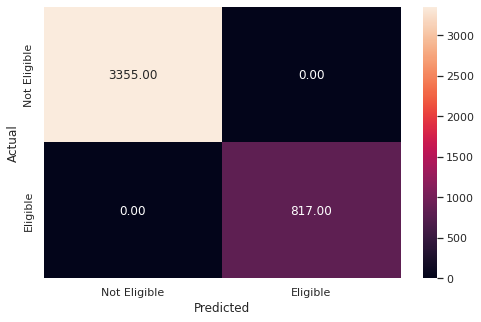

In [101]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.80      0.65      0.72       372

    accuracy                           0.89      1788
   macro avg       0.86      0.80      0.83      1788
weighted avg       0.89      0.89      0.89      1788



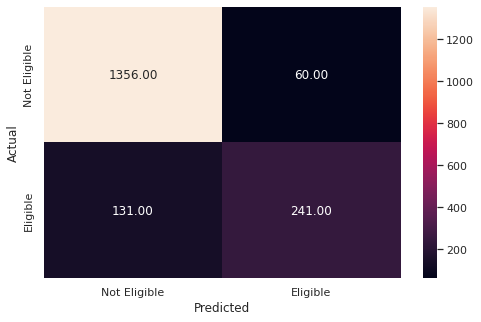

In [102]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [103]:
rf_estimator_test = model_performance_classification(rf_estimator,X_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.856284,0.802738,0.893177


- The Random Forest is giving a 100% score for all metrics on the training dataset.
- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 70% for class 1.
- Precision is good for the test data- 89%
- Recall is 65% for the test data

Since this data is imbalance let's see if we are getting better results using a 'balanced' random forest model

### **Random Forest model with balanced class weights**

In [104]:
# Fitting the random forest tree classifier on the training data
rf_estimator_balanced = RandomForestClassifier(class_weight = 'balanced', random_state = 7)
rf_estimator_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



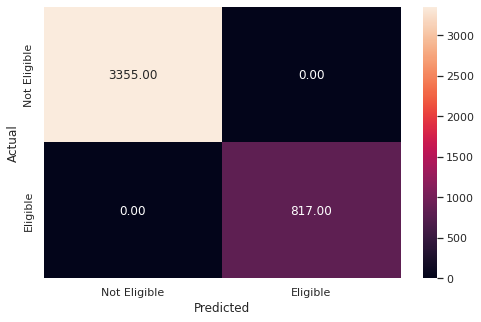

In [105]:
# Checking performance on the training data
y_pred_train3 = rf_estimator_balanced.predict(X_train)
metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1416
           1       0.80      0.61      0.69       372

    accuracy                           0.89      1788
   macro avg       0.85      0.78      0.81      1788
weighted avg       0.88      0.89      0.88      1788



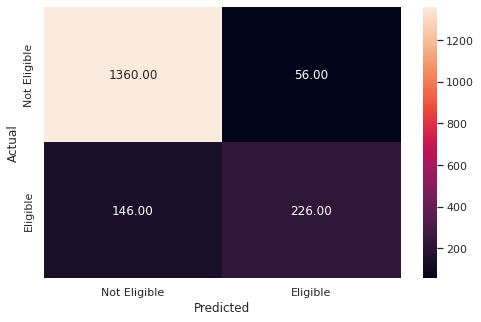

In [106]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator_balanced.predict(X_test)
metrics_score(y_test, y_pred_test3)

In [107]:
rf_estimator_balanced_test = model_performance_classification(rf_estimator_balanced,X_test,y_test)
rf_estimator_balanced_test

,Precision,Recall,Accuracy
0,0.852236,0.783989,0.887025


- The balanced random forest did not improve the model performance.
- The balanced Random Forest is also giving a 100% score for all metrics on the training dataset.
- The balanced Random Forest classifier is also overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 63% for class 1 compared to 70% in the baseline model
- Precision is good for the test data- 87%
- Recall is 61% for the test data

### **Tuning the Random Forest**

In [108]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [109]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=3,
                       n_estimators=250, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      3355
           1       0.80      0.97      0.88       817

    accuracy                           0.95      4172
   macro avg       0.89      0.96      0.92      4172
weighted avg       0.95      0.95      0.95      4172



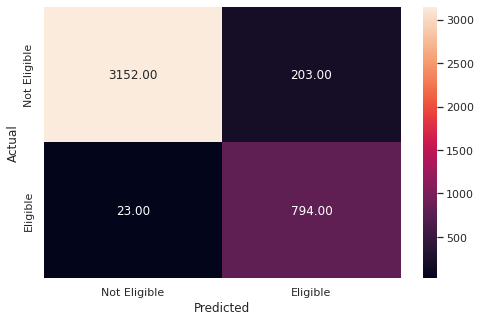

In [110]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1416
           1       0.71      0.75      0.73       372

    accuracy                           0.88      1788
   macro avg       0.82      0.83      0.83      1788
weighted avg       0.89      0.88      0.88      1788



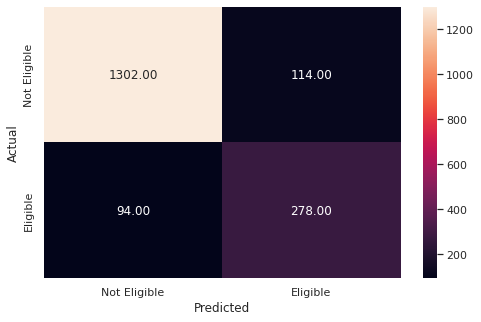

In [111]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [112]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.820924,0.833402,0.883669


- The tuned random forest improves the model performance.
- The tuned Random Forest is not giving a 100% score for all metrics on the training dataset- there is less overfitting of the training data
- The recall on the training data is 97%, while the recall on the test data is only 75% for class 1 compared to 65% in the baseline model and 61% for the balanced random forest model. 
- Precision for the test set is 71%, it has decreased compared to the baseline model and balanced model at 80%, this is expected as we were trying to reduce overfitting 
- In our case, we are assessing the model mainly by the recall score. in the tuned random forest we got the lowest number of false negative cases so far.

#### Checking the feature importance- tuned Random forest

<AxesSubplot:xlabel='Importance'>

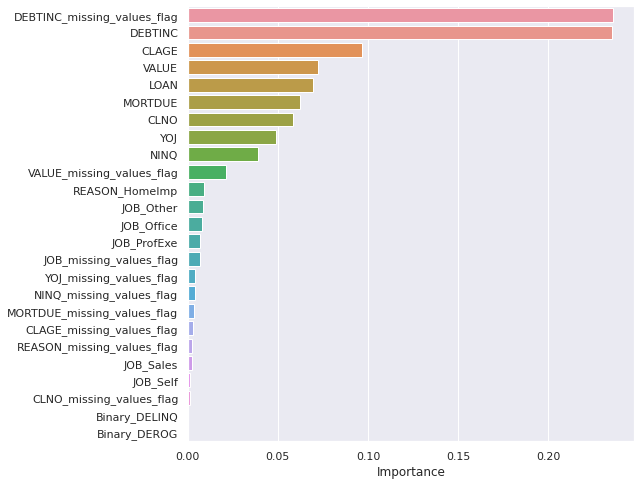

In [113]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(importance_df.Importance, importance_df.index)

- The feature importance plot for the random forest suggests that the DEBTINC_missing_values_flag followed by DEBTINC are the most important features. This is similar to the feature importance of the decision tree. 
- Other important features are CLAGE, VALUE, LOAN, MORTDUE, and CLNO.

# Boosting Models

In [114]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [115]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [116]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,X_test,y_test)

adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.842392,0.776848,0.881991


In [117]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, X_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.842304,0.781518,0.88311


In [118]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,X_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.872128,0.810302,0.900447


<AxesSubplot:xlabel='Importance'>

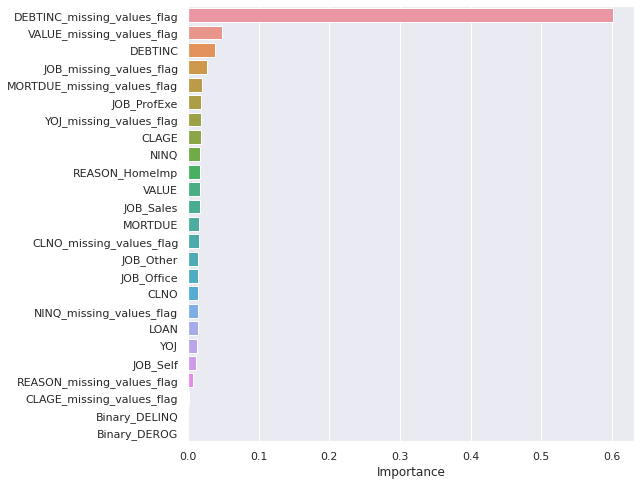

In [119]:
importances = xgb.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 8))
sns.barplot(importance_df.Importance, importance_df.index)

Again we can see that the DEBTINC_missing_value has the weights the most on the prediction to default a loan. 
The other features are less important according to this model. 

# K-Nearest Neighbors (KNN)

In [120]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []
test_error = []
knn_many_split = {}
error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.30)
    
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.23575612353567624],
 2: [0.12738584474885845, 0.18458466453674127],
 3: [0.1231164383561644, 0.19858892438764641],
 4: [0.15239726027397257, 0.18522364217252393],
 5: [0.1494292237442922, 0.19118743343982955],
 6: [0.16479452054794522, 0.18445154419595317],
 7: [0.16052511415525111, 0.18796592119275823],
 8: [0.1704680365296804, 0.1869275825346113],
 9: [0.1681392694063927, 0.18650159744408945],
 10: [0.17404109589041097, 0.18461128860489887],
 11: [0.17267123287671232, 0.18578274760383387],
 12: [0.17768264840182646, 0.18642172523961656],
 13: [0.17517123287671235, 0.18644834930777418],
 14: [0.1803310502283105, 0.18809904153354634]}

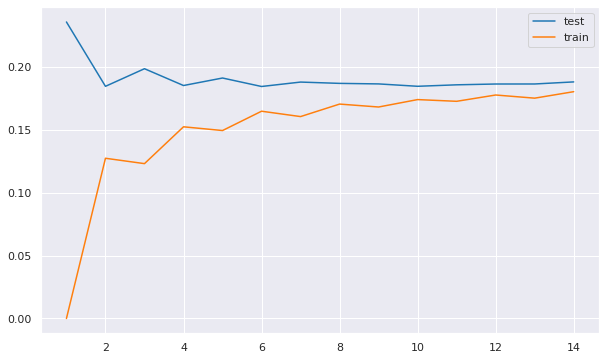

In [121]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations:**
- We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to 6. But the training error keeps increasing with increasing K.
- This implies that we would get a lower train and test error if we choose K = 6. 
- So, let's fit the K-NN model with **K=6** on the entire training set.

In [122]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 6)

In [123]:
# Fitting data to the K-NN model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3355
           1       0.84      0.22      0.35       817

    accuracy                           0.84      4172
   macro avg       0.84      0.61      0.63      4172
weighted avg       0.84      0.84      0.80      4172



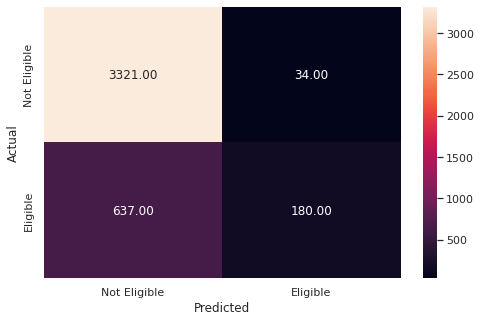

In [124]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(X_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1416
           1       0.76      0.16      0.26       372

    accuracy                           0.81      1788
   macro avg       0.79      0.57      0.58      1788
weighted avg       0.80      0.81      0.76      1788



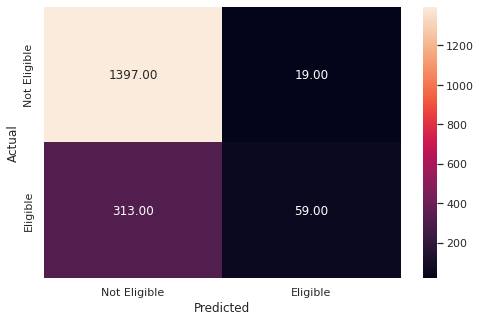

In [125]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(X_test)

metrics_score(y_test, y_pred_test_knn)

In [126]:
knn_test = model_performance_classification(knn, X_test, y_test)
knn_test

,Precision,Recall,Accuracy
0,0.786685,0.572592,0.814318


- The model is not performing well.
- The Recall score on the train and test sets are extremely low
- let's try to tune this model

In [127]:
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(X_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


We have found the best hyperparameters for the K-NN classifier. Let's use these parameters to build the new K-NN model and find the recall of that model.

In [128]:
# Fit the best estimator on the training data
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



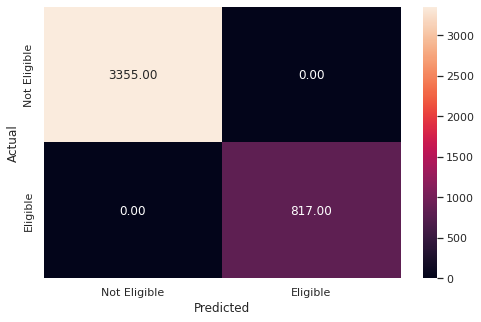

In [129]:
y_pred_train_knn_estimator = knn_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1416
           1       0.53      0.27      0.36       372

    accuracy                           0.80      1788
   macro avg       0.68      0.61      0.62      1788
weighted avg       0.77      0.80      0.77      1788



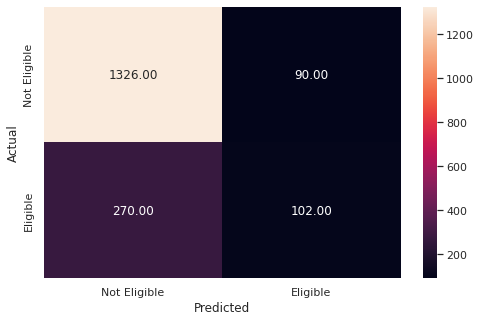

In [130]:
y_pred_test_knn_estimator = knn_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_knn_estimator)

In [131]:
knn_tuned_test = model_performance_classification(knn_estimator, X_test, y_test)
knn_tuned_test

,Precision,Recall,Accuracy
0,0.681039,0.605317,0.798658


- The tuned model is overfitting the train data
- The recall and precision scores for the test data are low
- The tuned model is not performing well

# Comparing Model Performances

In [132]:
models_test_comp_df = pd.concat(
    
    [    
    lg_test.T, lg_6_test.T, lg_45_test.T, 
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_balanced_test.T, rf_estimator_tuned_test.T,
    adaboost_model_perf_test.T, gbc_perf_test.T, xgb_perf_test.T, knn_test.T, knn_tuned_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Logistic regresstion model",
    "Logistic regresstion model using 0.6 treshold",
    "Logistic regresstion model using 0.45 treshold",
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Balanced Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "gbc classifier",
    "XGBoost classifier",
    "KNN",
    "Tuned KNN"
]

print("Test performance comparison:")

Test performance comparison:


In [133]:
models_test_comp_df.T

,Precision,Recall,Accuracy
Logistic regresstion model,0.584796,0.627893,0.606823
Logistic regresstion model using 0.6 treshold,0.584796,0.627893,0.606823
Logistic regresstion model using 0.45 treshold,0.584796,0.627893,0.606823
Decision Tree classifier,0.796403,0.758475,0.860738
Tuned Decision Tree classifier,0.753021,0.813445,0.831655
Random Forest classifier,0.856284,0.802738,0.893177
Balanced Random Forest classifier,0.852236,0.783989,0.887025
Tuned Random Forest classifier,0.820924,0.833402,0.883669
Adaboost classifier,0.842392,0.776848,0.881991
gbc classifier,0.842304,0.781518,0.883110


#  final solution design

- I have tried multiple models and was able to identify the key factors involved with loan default.
- The prominent feature that is the most impactful in the change to default on a loan is the DEBTINC_missing_values_flag followed by DEBTINC. This emphasizes the impact of missing values on the prediction and should be communicated to the data entry team. A high debt-to-income ratio indicates that the applicant can not afford his/hers monthly mortgage payments, and having too much debt can be a sign of missing a payment or defaulting on the loan. The bank should consider this as a top feature to consider while processing a loan request.
- More feature that positively affect loan default is the age of the oldest credit line in months.
- We can see that the financial background is more relevant than the job profile, the reason for the loan, the actual amount of the mortgage, the value of the property, and the amount of loan that was requested. 
- The bank should consider CLAGE, VALUE, LOAN, MORTDUE, and CLNO as a set of features that have a high impact on defaulting on a loan.
- The 'personal' features like the employment profile, and the loan reason request are nice to have rather than must have, and therefore should not be the main focus when processing a loan application.
- The best model we have got is the tuned random forest model which is giving an average of 84% recall for class 1 on the test data, 82% precision score, and 88% accuracy- These parameters are meeting the model evolution criteria that were defined in the begging of the project. 
- This model is good and does not requires further tuning.
- The bank can use this model to predict clients who are likely to default on their loan 
- In boosting algorithms, XGBoost has given good scores among other algorithms, but since we are focused on getting a high recall score the tuned RF classifier is a better fit for our case. 
- The final model, a hyperparameter-tuned K-NN classifier, is overfitting on the training dataset and gives low recall on the testing datasets. 
- Based on the models that were tested we can conclude that the debt-to-income ratio is the most impact feature in the chance to default on a loan. 